In [1]:
"""
A simple python project to detect breast cancer from image scans
This project primarily use sklearn, numpy, seaborn,and pandas
Uses four machine learning approaches:
    Neural Networks
    Logistic Regression
    Decision Tree
    Support Vector Machine
"""
print("notebook running...")

notebook running...


In [2]:
# Libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as lE
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# Import Cancer dataset
data = pd.read_csv('datasets_180_408_data.csv')
pd.DataFrame(data)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# remove the empty column (NaN)
data = data.drop(['Unnamed: 32', 'id'], axis = 1)
data.shape

(569, 31)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

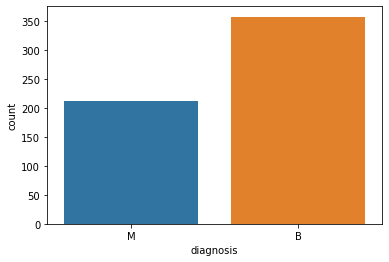

In [7]:
# Vizualize size of data for both categories
sns.countplot(data['diagnosis'], label= 'cases')

In [8]:
# encode and transform the M = 1 and B = 0 values categorically
data.iloc[:,0] = lE().fit_transform(data.iloc[:,0].values)

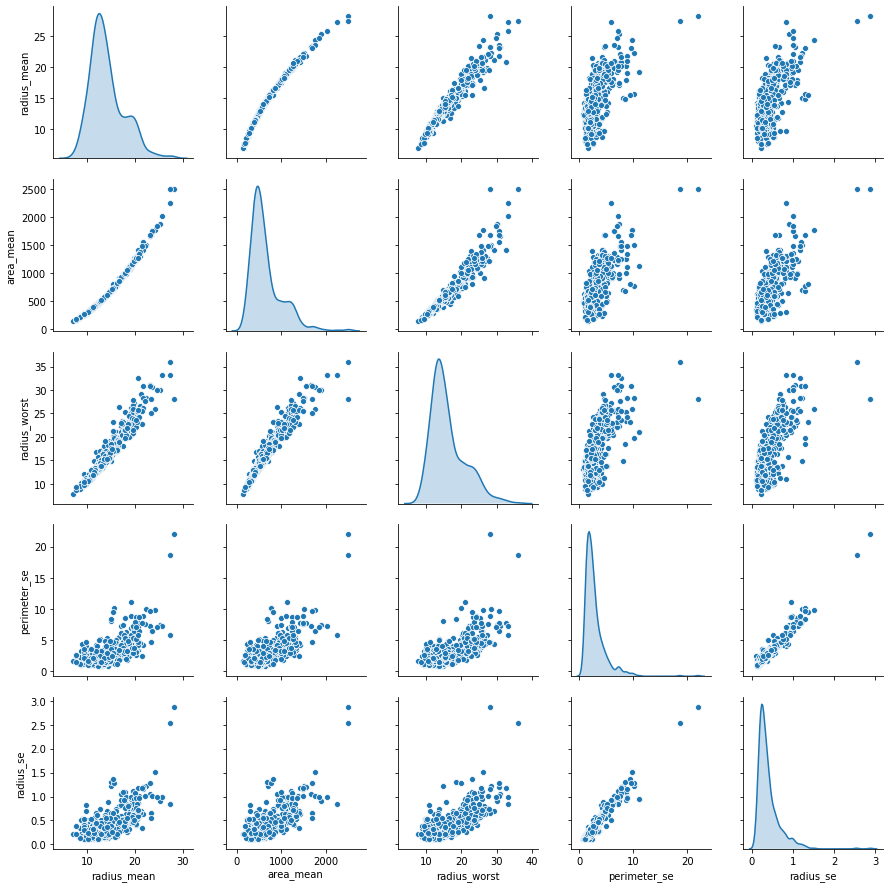

In [9]:
# pair plots
sns.pairplot(data[["radius_mean", "area_mean", "radius_worst", "perimeter_se", "radius_se"]], diag_kind="kde")

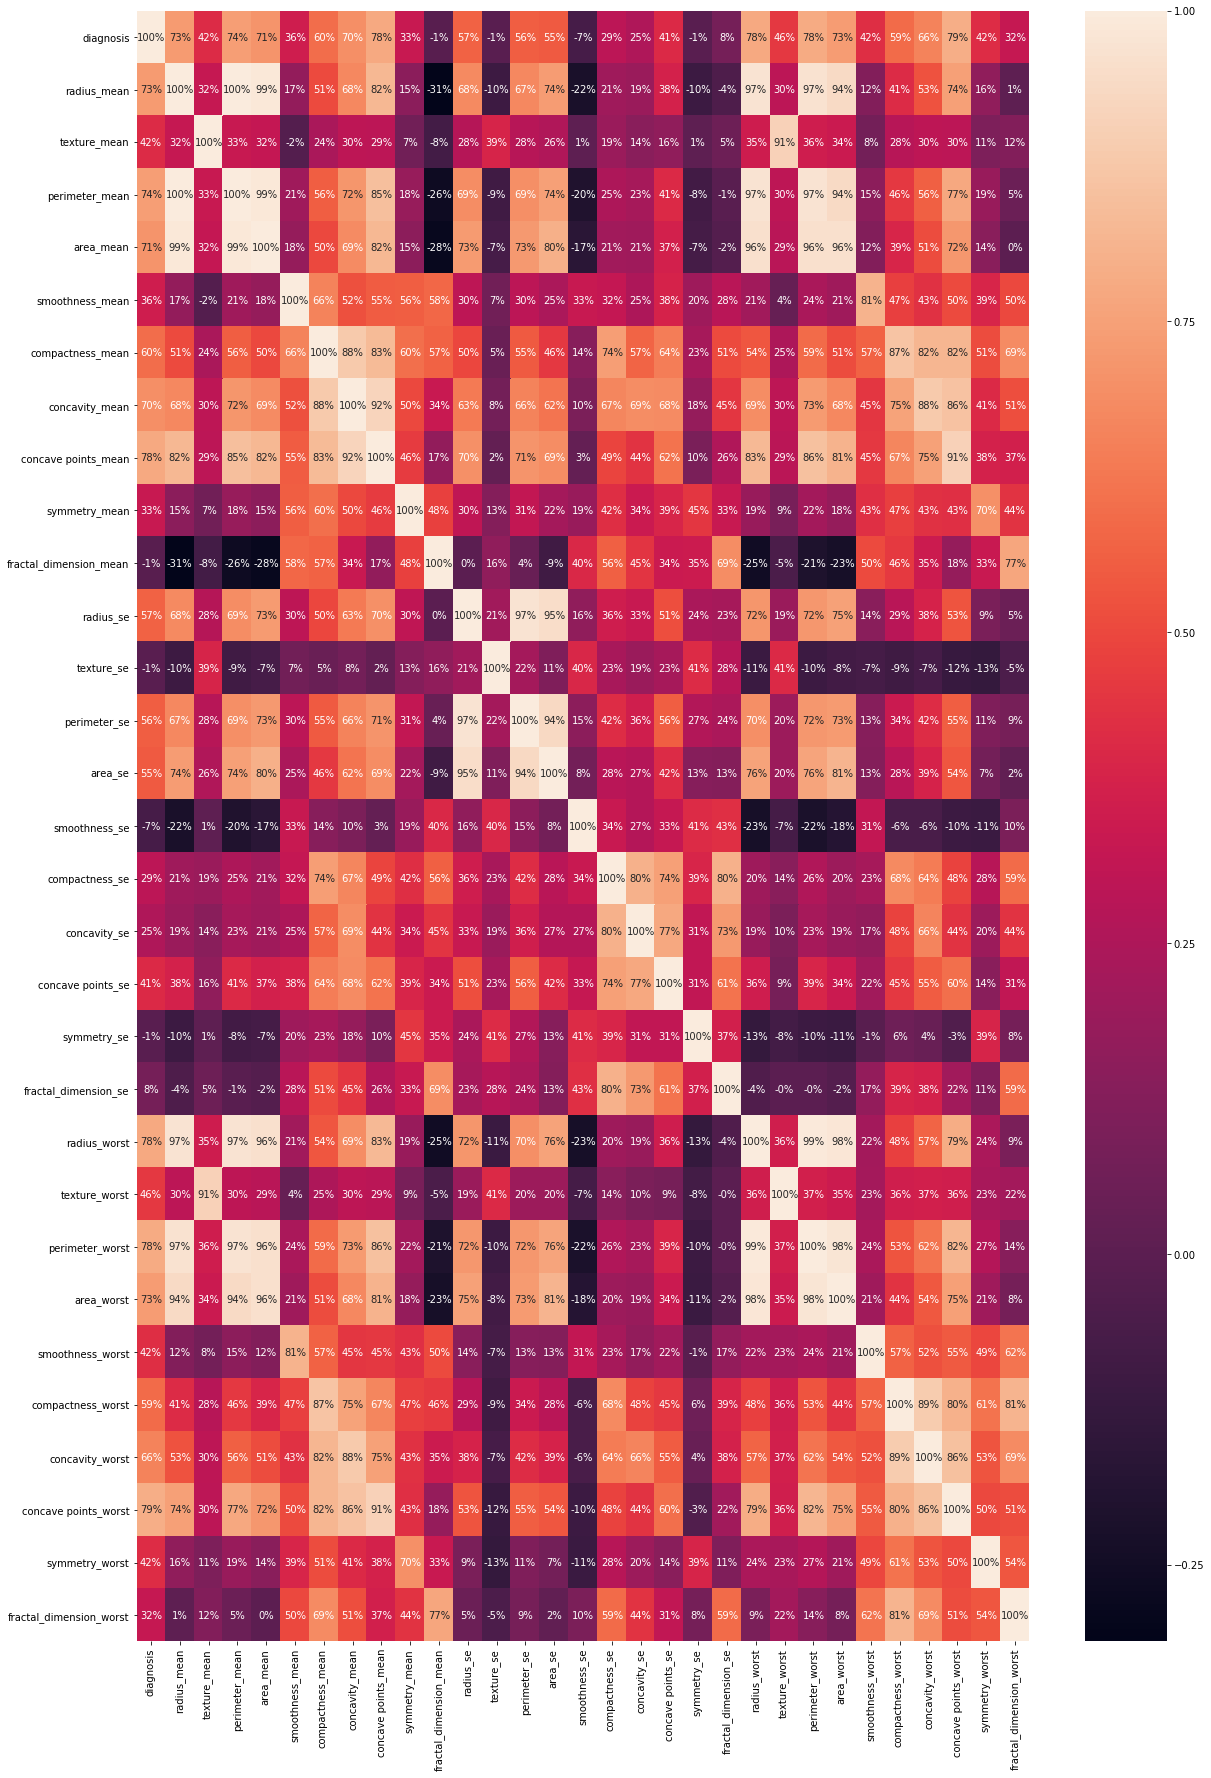

In [10]:
# heat map correlation
plt.figure(figsize = (20, 30))
sns.heatmap(data.corr(), annot = True, fmt = '.0%')

In [11]:
# Split data into independent X and dependent Y data sets
X = data.iloc[:, 1:32].values
Y = data.iloc[:, 0].values

In [12]:
# 80% 20% train test split
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.20, random_state = 42)

In [13]:
# Normalize/ feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
# Create and test models
def models(X_train, Y_train, X_test, Y_test):
    # Neural Network
    from sklearn.neural_network import MLPClassifier
    net = MLPClassifier(hidden_layer_sizes = (5, 2), solver= 'lbfgs', learning_rate_init = 0.0001, random_state = 42)
    net.fit(X_train, Y_train)
    
    # Logistic regression
    from sklearn.linear_model import LogisticRegression
    logR = LogisticRegression(solver = 'lbfgs',random_state = 42)
    logR.fit(X_train, Y_train)
    
    # Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
    tree.fit(X_train, Y_train)
    
    #SVM
    from sklearn.svm import SVC
    svc = SVC()
    svc.fit(X_train, Y_train)
    
    # Print model accuracies
    print('Neural Network Training Accuracy:', net.score(X_test, Y_test))
    print('Logistic Regression Training Accuracy:', logR.score(X_test, Y_test))
    print('Decision Tree Training Accuracy:', tree.score(X_test, Y_test))
    print('Support Vector Machine Training Accuracy:', svc.score(X_test, Y_test))
    
    return net, logR, tree, svc

In [15]:
# Execute method
model = models(X_train, Y_train, X_test, Y_test)

Neural Network Training Accuracy: 0.9912280701754386
Logistic Regression Training Accuracy: 0.9824561403508771
Decision Tree Training Accuracy: 0.9210526315789473
Support Vector Machine Training Accuracy: 0.9824561403508771


In [16]:
# Test accuracy on confusion matrix
for i in range(len(model)):
    print('Model', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    print("ACCURACY:",accuracy_score(Y_test, model[i].predict(X_test)))
    print("---------------------------------------------------------")

Model 0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

ACCURACY: 0.9912280701754386
---------------------------------------------------------
Model 1
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

ACCURACY: 0.9824561403508771
---------------------------------------------------------
Model 2
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        71
           1       0.95      0.84      